<a href="https://colab.research.google.com/github/somsubhra999/nlpc7_keras_embedding/blob/master/keras_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
from keras import models, layers, backend
from keras.utils.np_utils import to_categorical
from keras.datasets import reuters
from keras.preprocessing.sequence import pad_sequences
from pprint import pprint
import matplotlib.pyplot as plt

Creating word index and reverse word index for the Reuters dataset and printing first 10 samples of each

In [179]:
word_index = reuters.get_word_index()
reverse_word_index = dict(map(reversed, word_index.items()))

pprint(dict(list(word_index.items())[0: 10]))
pprint(dict(list(reverse_word_index.items())[0: 10]))

{'chanthaburi': 20675,
 'degussa': 12089,
 'fawc': 16260,
 'hanging': 13796,
 'hermann': 8804,
 'localized': 20672,
 'mdbl': 10996,
 'refunding': 10997,
 'sation': 20673,
 'woods': 8803}
{8803: 'woods',
 8804: 'hermann',
 10996: 'mdbl',
 10997: 'refunding',
 12089: 'degussa',
 13796: 'hanging',
 16260: 'fawc',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi'}


Loading data and associated labels. The entire dataset is split with a 0.2 ratio which means 80% of the data will be used for training and 20% for testing.

Words are ranked by how often they occur (in the training set) and only the `num_words` most frequent words are kept. For our training we are keeping only the top 100 frequent words.

In [221]:
max_length = 100
(x_train, y_train), (x_test, y_test) = reuters.load_data(test_split=0.2, num_words=max_length)

Converting the class vectors to binary class matrices (one-hot encoded).

In [222]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

categories = len(y_train_cat[0])

print('Total categories = {}'.format(categories))

Total categories = 46


Padding zeroes to the end of each sequence to ensure that each sequence has a uniform length.

In [223]:
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

Creating and adding layers to the model.

In [224]:
backend.clear_session()
model = models.Sequential()
model.add(Embedding(max_length, 8, input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(categories, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 8)            800       
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                36846     
Total params: 37,646
Trainable params: 37,646
Non-trainable params: 0
_________________________________________________________________


Training the model for 10 epochs.

In [225]:
history = model.fit(x_train,
                    y_train_cat,
                    epochs=10,
                    validation_data=(x_test, y_test_cat))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 1s 91us/step - loss: 0.0681 - accuracy: 0.9814 - val_loss: 0.0596 - val_accuracy: 0.9842
Epoch 2/10
8982/8982 [==============================] - 1s 78us/step - loss: 0.0577 - accuracy: 0.9844 - val_loss: 0.0565 - val_accuracy: 0.9852
Epoch 3/10
8982/8982 [==============================] - 1s 78us/step - loss: 0.0552 - accuracy: 0.9854 - val_loss: 0.0547 - val_accuracy: 0.9859
Epoch 4/10
8982/8982 [==============================] - 1s 80us/step - loss: 0.0532 - accuracy: 0.9859 - val_loss: 0.0535 - val_accuracy: 0.9862
Epoch 5/10
8982/8982 [==============================] - 1s 79us/step - loss: 0.0518 - accuracy: 0.9863 - val_loss: 0.0526 - val_accuracy: 0.9864
Epoch 6/10
8982/8982 [==============================] - 1s 77us/step - loss: 0.0506 - accuracy: 0.9865 - val_loss: 0.0520 - val_accuracy: 0.9866
Epoch 7/10
8982/8982 [==============================] - 1s 75us/step - loss: 0.049

Evaluating test data

In [226]:
results = model.evaluate(x_test, y_test_cat, batch_size=128)
print("test loss = {}\ntest accuracy = {}".format(results[0], results[1]))

2246/2246 [==============================] - 0s 15us/step
test loss = 0.05040389409194222
test accuracy = 0.9869139194488525


Plotting model loss and accuracy charts

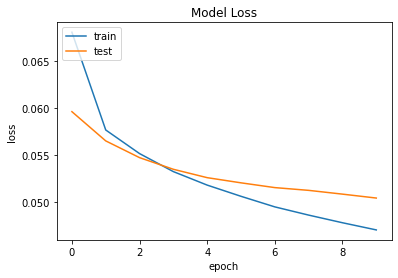

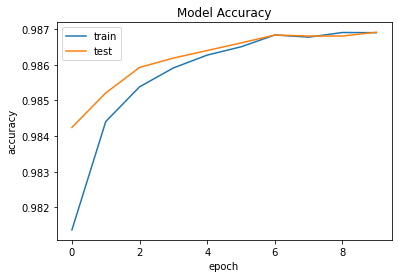

In [227]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()